# Nuages de mots

## Imports et stopwords

In [105]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tdeganck\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "leurs", "petit", "ecr", 
       "tél", "rue", "francs", "etc", "app", "quand", "sér", "chez", "jours", "chaussée", "toute", 
       "heures", "avant", "près", "tant", "avenue", "ceux", "celui", "quelque", "quelques", "jamais", 
       "vers", "rien", "année", "puis", "devant", "très", "vient", "très", "déjà", "contenant", "mois", 
       "grand", "heure", "bon", "cuis", "belle", "petite", "jour",
       "hier", "pens", "bons", "cent", "fort", "sach", "appr", "alors", "cent", "plusieurs", "seul", "part",
       "gros", "pers", "aujourd", "toujours", "bonne", "grande", "chaque", "fois", "trop", "boulevard", "monsieur", "elles", 
       "louée", "suite", "soir", "prix", "vend", "vendre", "quart", "ouvr", "addresser", "prés", 
       "cert", "assez", "pris", "chamb", "chambre", "louer", "place", "demande", "midi", "nord", "fille", "garçon", 
       "maison", "vente", "femme", "temps", "homme", "partie", "ventes", "serv", "bonnes", 
       "matin", "brux", "jeune", "lieu", "demi", "beau", "service", "dame", "adresser", "hommes", "prop", "neuf", 
       "neuve", "occas", "nouveau", "seule", "moment", "voir", "première", "journ", "dernier", "courant",
       "vieux", "nouvelle", "chaus", "nuit", "garn", "nommé"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [107]:
# Choisir une année
year = 1906

In [108]:
# Lister les fichiers de cette année
data_path = '../../data'
txt_path = '../../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

101

In [109]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [110]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

101

In [111]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'Veadredi 5 JaaYÎer 1906,3! Edition ABONNEMENT pour toute la Belgique : S mois, fr.2.25; 6 mois, tr. 4.25; 4 an, 8 te. --issai*- Le SOER est distribué dans toute l’agglomération bruxelloise (rez-do* ch'

In [112]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [113]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'Veadredi 5 JaaYÎer 1906,3! Edition ABONNEMENT pour toute la Belgique : S mois, fr.2.25; 6 mois, tr. 4.25; 4 an, 8 te. --issai*- Le SOER est distribué dans toute l’agglomération bruxelloise (rez-do* chaussée) contre 30 centimes par moi*, montant des Irais d’envoL Abonuornect d\'étage : 60 cent, par mois* Hollande et Grand-Duché 4 6 fr. par an. - Pays do l\'Union postale 24 Ir. par a "- On peut s aoùnner à tous les bureetust d§ jjoste étaux facteurs en tournis. . . TIRAGE: 150.000 EXEMPlj No 5 parai'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [114]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 3 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [115]:
clean_text(year, folder=temp_path)

'Output has been written in ../../data/tmp/1906_clean.txt!'

In [116]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'VEADREDI JAAYÎER EDITION ABONNEMENT BELGIQUE ISSAI SOER DISTRIBUÉ AGGLOMÉRATION BRUXELLOISE CENTIMES MONTANT IRAIS ENVOL ABONUORNECT ÉTAGE HOLLANDE DUCHÉ PAYS UNION POSTALE AOÙNNER BUREETUST JJOSTE ÉTAUX FACTEURS TOURNIS TIRAGE EXEMPLJ PARAISSENT PAGES BUREAUX PLAGE LOUVAIN REDACTION TÉLÉPHONES ADMINISTRATION TÉLÉPHONE ÉDITIONSPAR ÀSTLETB INSERTIONS PETITES ANNONCES LIGNES LIGNE FAITS CORPS LIGUE FAITS DIVERS RÉPARATIONS JUDICIAIRES LIGNE SPORT CARNET MODE NÉCROLOGIES LIGNE RÉCLAMES SPECTACLES A'

## Nuage de mots

Compter le nombre de mots uniques

In [117]:
# Renseigner le chemin ver le fichier contenant les mots nettoyés
file_path = "../../data/tmp/1906_clean.txt"

# Lire le fichier et récupérer les tokens (lignes séparées par des espaces ou une nouvelle ligne)
with open(file_path, 'r', encoding='utf-8') as f:
    tokens = f.read().split()  # Lire tout le texte et le diviser en tokens

# Créer un ensemble de tokens uniques
unique_tokens = set(tokens)

# Afficher le nombre de tokens différents
num_unique_tokens = len(unique_tokens)
print(f"Le nombre de tokens différents est : {num_unique_tokens}")


Le nombre de tokens différents est : 78772


### Afficher les termes les plus fréquents


In [118]:
frequencies = Counter(after.split())
print(frequencies.most_common(150))

[('BRUXELLES', 2062), ('COUR', 678), ('NOTAIRE', 644), ('SALLE', 638), ('SAINT', 626), ('POSTE', 616), ('PARIS', 614), ('AGENCE', 610), ('ÉTAT', 598), ('MARCHÉ', 578), ('COURS', 576), ('ANVERS', 574), ('CENTRE', 568), ('JUIN', 560), ('AOÛT', 508), ('CAUSE', 494), ('PORTE', 484), ('GÉNÉRAL', 484), ('MARS', 476), ('BELGIQUE', 472), ('OCCASION', 468), ('COMMERCE', 462), ('MORT', 446), ('GOUVERNEMENT', 442), ('PIANO', 422), ('GARE', 404), ('DÉCEMBRE', 402), ('ETAT', 396), ('PIANOS', 390), ('TERRE', 372), ('TRAVAIL', 368), ('POINT', 366), ('ENFANTS', 364), ('BOURSE', 364), ('BUREAU', 362), ('MINISTRE', 360), ('SALON', 358), ('PAYS', 348), ('CONSEIL', 348), ('OUVRIER', 348), ('SOCIÉTÉ', 344), ('ORDRE', 336), ('PREMIER', 336), ('OUVRIERS', 334), ('POLICE', 334), ('ROYALE', 334), ('CONGO', 334), ('CHÊNE', 330), ('JARDIN', 326), ('BOIS', 322), ('LOUVAIN', 318), ('LIÈGE', 318), ('MAIN', 316), ('FRAIS', 316), ('SERVANTE', 316), ('MARDI', 314), ('COURSES', 314), ('QUESTION', 312), ('PRÉSIDENT', 31

Afficher les résultats dans un tableau

In [119]:
# Récupérer les 150 mots les plus fréquents
most_common_words = frequencies.most_common(10000)

# Créer un DataFrame pandas pour le tableau
df = pd.DataFrame(most_common_words, columns=["Mot", "Fréquence"])

# Modifier les options d'affichage pour scroller dans Jupyter
pd.set_option('display.max_rows', 10000)  # Ajuster le nombre de lignes affichées
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes

# Afficher le tableau
print(df)

                    Mot  Fréquence
0             BRUXELLES       2062
1                  COUR        678
2               NOTAIRE        644
3                 SALLE        638
4                 SAINT        626
5                 POSTE        616
6                 PARIS        614
7                AGENCE        610
8                  ÉTAT        598
9                MARCHÉ        578
10                COURS        576
11               ANVERS        574
12               CENTRE        568
13                 JUIN        560
14                 AOÛT        508
15                CAUSE        494
16                PORTE        484
17              GÉNÉRAL        484
18                 MARS        476
19             BELGIQUE        472
20             OCCASION        468
21             COMMERCE        462
22                 MORT        446
23         GOUVERNEMENT        442
24                PIANO        422
25                 GARE        404
26             DÉCEMBRE        402
27                 E

Afficher les mots les moins fréquents

In [120]:
# Filtrer les mots dont la fréquence est <= 3
tokens_3_or_less = [word for word in all_words if word[1] <= 3]

# Compter le nombre de tokens qui apparaissent 3 fois ou moins
num_tokens_3_or_less = len(tokens_3_or_less)

# Afficher le résultat
print(f"Il y a {num_tokens_3_or_less} tokens qui apparaissent 3 fois ou moins dans le texte.")


Il y a 58190 tokens qui apparaissent 3 fois ou moins dans le texte.


In [121]:
# Trier tous les mots par fréquence
all_words = frequencies.most_common()  # Récupère tous les mots du texte triés par fréquence

# Filtrer cette liste en excluant les mots dont la fréquence est inférieure à 3
filtered_words = [word for word in all_words if word[1] >= 5]  # Garder les mots dont la fréquence est >= 3

# Trier les mots par fréquence croissante (les moins fréquents d'abord)
least_common_words = sorted(filtered_words, key=lambda x: x[1])  # Tri par fréquence croissante

# Afficher un échantillon des 10 mots les moins fréquents
print("Échantillon des 10 mots les moins fréquents après filtrage (fréquence >= 3) :")
print(least_common_words[:10])

# Créer un DataFrame pandas pour le tableau
df = pd.DataFrame(least_common_words, columns=["Mot", "Fréquence"])

# Modifier les options d'affichage pour scroller dans Jupyter
pd.set_option('display.max_rows', 30000)  # Ajuster le nombre de lignes affichées
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes

# Afficher le tableau
print(df)


Échantillon des 10 mots les moins fréquents après filtrage (fréquence >= 3) :
[('ÉTAUX', 6), ('REDACTION', 6), ('SANCTIONS', 6), ('INSTITUTRICES', 6), ('LITIGE', 6), ('MODIFIÉE', 6), ('DISAIS', 6), ('MEURE', 6), ('CHÂTIMENT', 6), ('ATTENDAIS', 6)]
                      Mot  Fréquence
0                   ÉTAUX          6
1               REDACTION          6
2               SANCTIONS          6
3           INSTITUTRICES          6
4                  LITIGE          6
5                MODIFIÉE          6
6                  DISAIS          6
7                   MEURE          6
8               CHÂTIMENT          6
9               ATTENDAIS          6
10              PRÉCONISE          6
11             PROGRAMMES          6
12                  RIAIT          6
13                CULTIVÉ          6
14               CONTENIR          6
15                 AVALER          6
16                GRIMACE          6
17             ABSORPTION          6
18                  GOMMA          6
19          

### Créer, stocker et afficher le nuage de mots

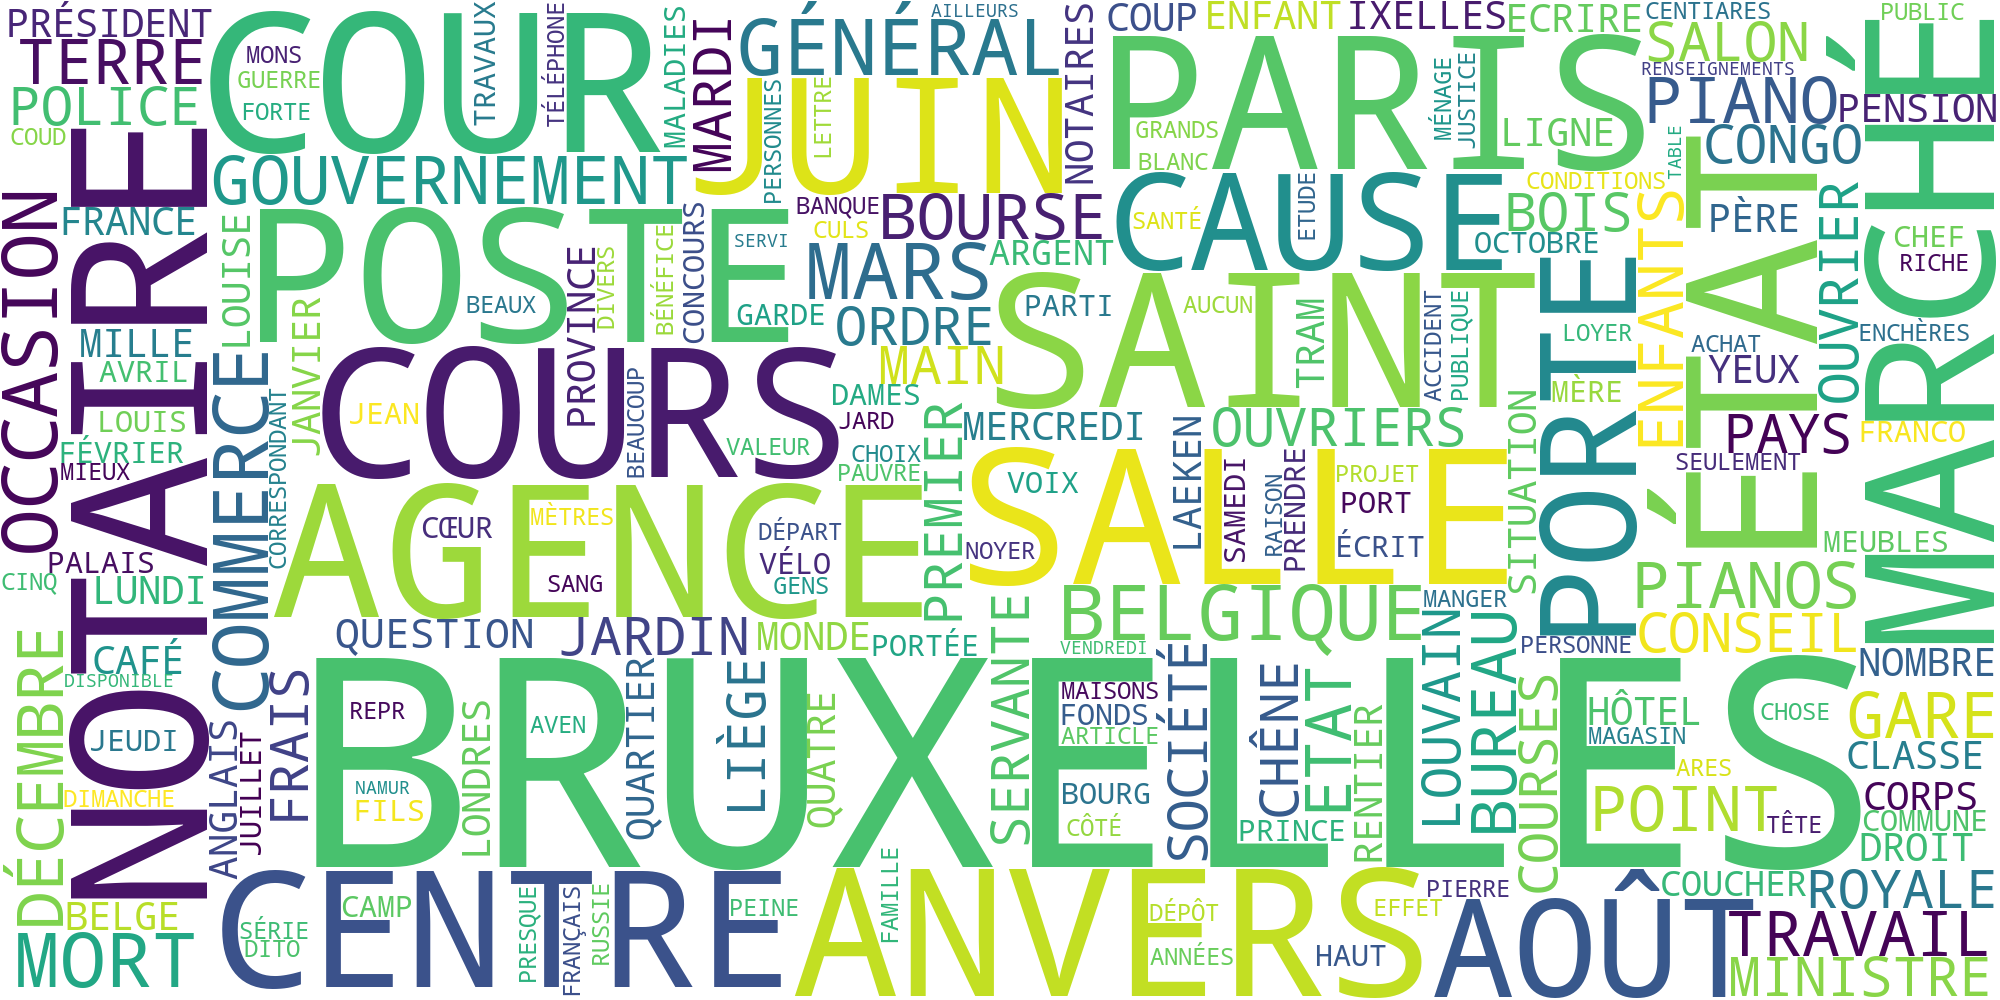

In [122]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))